Documentation [Click Here](https://docs.google.com/document/d/1bBdaBWIBwoSYIZ9tccA8fH3JwSoJmuO4ujCW2dVBhjM/edit)

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
data=pd.read_csv('https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/wbcd.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [45]:
data.shape

(569, 32)

In [46]:
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [47]:
data.isnull().sum()

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

In [48]:
#split the dataset into input and output
#dropping id and diagnosis columns
X=data.drop(['id','diagnosis'],axis=1)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [49]:
#Accessing o/p column
y=data.diagnosis
y.head()

0    B
1    B
2    B
3    B
4    B
Name: diagnosis, dtype: object

In [50]:
#Preparing Trainning and testing data
#Storing 70% of the data(569 rows) into training and remaining 30% of the data into testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=2)

In [51]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 30)
(171, 30)
(398,)
(171,)


In [52]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

#Scalinf for training data
scaled_X_train=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
scaled_X_train

#Scaling for test data
scaled_X_test=pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)
scaled_X_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,-0.767981,-0.055433,-0.795918,-0.721932,-0.589333,-0.996232,-0.780212,-0.661564,0.810759,-0.417646,...,-0.785433,0.137175,-0.806874,-0.716765,-0.854530,-0.972772,-0.923478,-0.752143,0.726302,-0.720284
1,-0.116925,-0.731688,-0.158591,-0.209416,-0.875377,-0.728226,-0.760262,-0.697520,0.281483,-0.839423,...,-0.273344,-0.865993,-0.216452,-0.348722,-0.911689,-0.222689,-0.624656,-0.633669,0.824098,-0.330910
2,1.100998,-0.544639,1.047734,0.940735,-0.426476,0.438365,0.300001,0.371772,-0.289084,-0.675726,...,0.870599,-0.559798,0.797992,0.733636,-0.216988,0.157285,0.858626,0.630104,-0.015897,-0.042321
3,-0.922326,1.220340,-0.929322,-0.818221,-0.951934,-0.683493,-0.888348,-1.005166,0.671871,0.132434,...,-0.647087,1.035458,-0.669891,-0.636120,-0.476402,-0.531335,-0.990740,-1.196269,0.363061,-0.372215
4,0.570612,-1.021855,0.510866,0.408905,-0.045084,-0.310914,-0.386171,-0.065263,-0.232778,-0.535625,...,0.319276,-0.972569,0.280965,0.134281,-0.467608,-0.472006,-0.138962,0.016578,-0.127664,-0.710370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,-0.860588,-0.549435,-0.846758,-0.785752,0.842278,-0.447664,-0.697999,-0.583830,-0.311607,0.150131,...,-0.775109,0.187925,-0.787857,-0.695690,0.249076,-0.631995,-0.765225,-0.566574,0.256534,-0.231776
167,-0.086056,-0.798834,-0.053251,-0.195421,0.355099,0.532539,-0.095310,0.071722,-0.506801,0.483424,...,0.083880,-0.756033,0.114565,-0.101734,0.433744,0.741246,0.097336,0.400409,-0.457724,1.100466
168,-0.647311,-0.446318,-0.670242,-0.621444,-0.329040,-0.756086,-0.722523,-0.797030,0.187639,-0.323262,...,-0.560362,-0.141953,-0.607491,-0.537882,-0.300528,-0.469339,-0.572761,-0.880137,-0.125917,-0.099598
169,2.144933,0.448162,2.259753,2.343085,-0.110505,1.868645,1.704113,1.543105,-0.285331,-0.065182,...,2.483269,0.482278,2.658104,2.635688,-0.177417,1.529859,1.622939,1.092515,-0.031614,0.306298


In [53]:
#Model Building:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6,metric='euclidean')
#Apply the knn object on the dataset
# Syntax:objectname.fit(i/p,o/p)
knn.fit(scaled_X_train,y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=6)

In [54]:
y_train_pred=knn.predict(scaled_X_train)
y_train_pred

array(['B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M',
       'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B',
       'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M

In [55]:
#Check the accuracy,classification report
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred))


              precision    recall  f1-score   support

           B       0.97      1.00      0.98       257
           M       1.00      0.94      0.97       141

    accuracy                           0.98       398
   macro avg       0.98      0.97      0.97       398
weighted avg       0.98      0.98      0.98       398



In [56]:
from sklearn.metrics import accuracy_score
#Checking for optimum k-value
#build the models with multiple k values
scores=[]
for k in range(1,20):
    knn_model=KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train)
    pred_test=knn_model.predict(scaled_X_test)
    scores.append(accuracy_score(y_test,pred_test))
scores
    

[0.9181286549707602,
 0.9473684210526315,
 0.9590643274853801,
 0.9415204678362573,
 0.9590643274853801,
 0.9590643274853801,
 0.9649122807017544,
 0.9532163742690059,
 0.9590643274853801,
 0.9532163742690059,
 0.9532163742690059,
 0.9415204678362573,
 0.9473684210526315,
 0.935672514619883,
 0.9473684210526315,
 0.9415204678362573,
 0.9415204678362573,
 0.9415204678362573,
 0.9473684210526315]

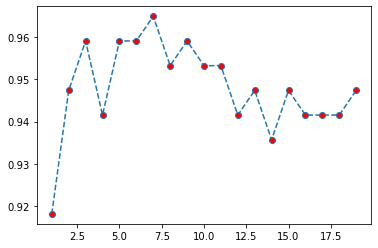

In [57]:
#Plot the k values and scores
plt.plot(range(1,20),scores,marker='o',markerfacecolor='r',linestyle='--')

In [58]:
final_model=KNeighborsClassifier(n_neighbors=7,metric='euclidean')
final_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [59]:
#Prediction on training data
final_train_pred = final_model.predict(scaled_X_train)

In [60]:
final_train_pred

array(['B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M',
       'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B',
       'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M

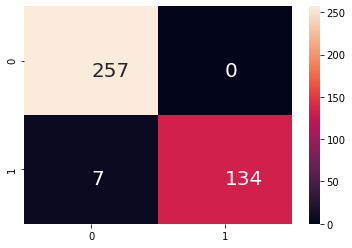

In [61]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_train,final_train_pred),annot=True,fmt='d',
            annot_kws={'size':20,'ha':'left','va':'top'})#d-->integer formatting


In [62]:
#Classification Report
print(classification_report(y_train,final_train_pred))

              precision    recall  f1-score   support

           B       0.97      1.00      0.99       257
           M       1.00      0.95      0.97       141

    accuracy                           0.98       398
   macro avg       0.99      0.98      0.98       398
weighted avg       0.98      0.98      0.98       398



In [63]:
#Predictions on Test Data
final_test_pred=final_model.predict(scaled_X_test)
final_test_pred

array(['B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M',
       'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M',
       'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M',
       'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'M', 'B'], dtype=object)

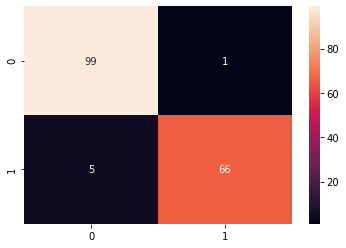

In [64]:
#Compare actual values of test data(y_test) and final_test_pred(model predicted values)
sns.heatmap(confusion_matrix(y_test,final_test_pred),annot=True,fmt='d')

In [65]:
#Classification Report
print(classification_report(y_test,final_test_pred))

              precision    recall  f1-score   support

           B       0.95      0.99      0.97       100
           M       0.99      0.93      0.96        71

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



In [66]:
#Predict the prob of a tumour being Benign or Maligant
#Predict -->give you the predicted value (B or M)
# Syntax:objectname:predict_proba(i/p values)
y_test_prob = final_model.predict_proba(scaled_X_test)
y_test_prob = pd.DataFrame(y_test_prob)
y_test_prob

,0,1
0,1.000000,0.000000
1,1.000000,0.000000
2,0.142857,0.857143
3,1.000000,0.000000
4,1.000000,0.000000
...,...,...
166,1.000000,0.000000
167,0.857143,0.142857
168,1.000000,0.000000
169,0.000000,1.000000


In [67]:
y_test

528    B
291    B
467    M
108    B
340    B
      ..
2      B
25     M
52     B
386    M
476    B
Name: diagnosis, Length: 171, dtype: object

In [68]:
from sklearn.metrics import roc_auc_score,roc_curve
m_prob=final_model.predict_proba(scaled_X_test)[:,1]
tpr,fpr,threshold = roc_curve(y_test,m_prob,pos_label='M')

In [69]:
tpr

array([0.  , 0.  , 0.  , 0.01, 0.06, 0.1 , 0.23, 1.  ])

In [70]:
fpr

array([0.        , 0.74647887, 0.88732394, 0.92957746, 0.95774648,
       0.95774648, 0.98591549, 1.        ])

In [71]:
threshold

array([2.        , 1.        , 0.71428571, 0.57142857, 0.42857143,
       0.28571429, 0.14285714, 0.        ])

In [72]:
pd.DataFrame(threshold)

,0
0,2.000000
1,1.000000
2,0.714286
3,0.571429
4,0.428571
5,0.285714
6,0.142857
7,0.000000


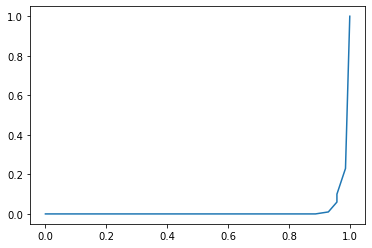

In [73]:
plt.plot(fpr,tpr)

In [74]:
roc_auc_score(y_test,m_prob)

0.9854929577464789

In [75]:
#KFold
#5 folds--> In each and every fold
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)
kfold.get_n_splits(X,y)


5

In [76]:
#model will built 5 times
model_knn=KNeighborsClassifier(n_neighbors=7,metric='euclidean')
score=[]
for train_index,test_index in kfold.split(X,y):
    X_train,X_test = X.iloc[train_index], X.iloc[test_index]
    y_train,y_test = y.iloc[train_index], y.iloc[train_index]
#pass the X_train,y_train into the knn algorithm
    model_knn.fit(X_train,y_train)
    #predict the model on test data(X_test,y_test)
    y_pred_test = model_knn.predict(X_test)
    #accuracy score of predicted values (y_pred_test) and A.V(y_test)
    accuracy = accuracy_score(y_test,y_pred_test)
    score.append(accuracy)
print(score)
    

ValueError: Found input variables with inconsistent numbers of samples: [455, 114]